# LUS-CS433

## 1. Code Exploration

### Imports

In [1]:
from __future__ import print_function, division

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import cv2
import seaborn as sns

### Downloading data

## 2. Data Exploration

In [3]:
diagnostics = pd.read_csv('labels_diagnostic.csv')

In [4]:
# getting the list of names
!ls LUS\ images/negative > neg_names.csv
!ls LUS\ images/positive > pos_names.csv

neg = pd.read_csv('neg_names.csv', header=None)
pos = pd.read_csv('pos_names.csv', header=None)

data = neg.append(pos, ignore_index=True)
data

ls: cannot access 'LUS\': No such file or directory
ls: cannot access 'images/negative': No such file or directory
ls: cannot access 'LUS\': No such file or directory
ls: cannot access 'images/positive': No such file or directory


EmptyDataError: No columns to parse from file

In [2]:
pos = pd.read_csv('pos_names.csv', header=None)

# removing .png extension
pos[0] = pos[0].apply(lambda x: x[:-4])

# extracting site
pos[0] = pos[0].apply(lambda x: x.split('_')[2])

pos

EmptyDataError: No columns to parse from file

In [3]:
sums = pd.get_dummies(pos).sum()

plt.bar(sums.index, sums.values)
plt.xlabel('Site')
plt.ylabel('Count')
plt.tight_layout()

NameError: name 'pos' is not defined

## 3. Apply mask on Data and sort files

In [4]:
! mkdir data/LUS_proc_images
! mkdir data/LUS_proc_images/train
! mkdir data/LUS_proc_images/val
! mkdir data/LUS_proc_images/train/true
! mkdir data/LUS_proc_images/train/false
! mkdir data/LUS_proc_images/val/true
! mkdir data/LUS_proc_images/val/false 

La syntaxe de la commande n'est pas correcte.
La syntaxe de la commande n'est pas correcte.
La syntaxe de la commande n'est pas correcte.
La syntaxe de la commande n'est pas correcte.
La syntaxe de la commande n'est pas correcte.
La syntaxe de la commande n'est pas correcte.
La syntaxe de la commande n'est pas correcte.


In [6]:
x = cv2.imread('data/LUS images/negative/117_QAIG_1.png')

In [7]:
nb_rows, nb_cols, rgb = x.shape
nb_cols791 = 791
print(nb_rows, nb_cols)

1080 804


In [8]:
# TODO comment

#Create a mask for all images
mask804 = np.zeros([1080, 804,3])
for row in range(nb_rows):
    for col in range(nb_cols):
        if row > 25 and row < 1010 and col < 762 and (-4/5 * row) + 300 < col and (4/5 * row) + len(x[0])-300 > col:
            mask804[row, col] = [1,1,1]


In [9]:
mask791 = np.zeros([1080,791, 3])
for row in range(nb_rows):
    for col in range(nb_cols791):
        if row > 25 and row < 1010 and col < 762 and (-4/5 * row + 293) < col and (4/5*row) + len(x[0])-293 > col:
            mask791[row, col] = [1,1,1]

In [10]:
mask792 = np.zeros([1080,792, 3])
for row in range(nb_rows):
    for col in range(792):
        if row > 25 and row < 1010 and col < 762 and (-4/5 * row + 293) < col and (4/5*row) + len(x[0])-293 > col:
            mask792[row, col] = [1,1,1]

In [92]:
nb_rows = 1080
nb_cols = 792
np.zeros((nb_rows,nb_cols)).shape


(1080, 792)

In [135]:
import glob
def create_samples(num_samples, ratio, path):
    images_path = glob.glob(path)
    train = int(num_samples * ratio)
    
    col_to_add = np.zeros((nb_rows, 1,3))
    
    for i, image in enumerate(images_path[:num_samples]):
        cv2_img = cv2.imread(image)
        if (len(cv2_img[0]) == 791):
            masked_img = cv2.resize(cv2_img * mask791, (nb_cols, nb_rows))
        else:
            masked_img = (cv2_img * mask804)[:,6:798]
        # Selecting image name from path name
        im_name = image.split("/")[-1]
        #Disgusting but had problem because name was negative\\file_name
        im_name = im_name[9:]
        
        if i >= train:
            cv2.imwrite(f"data/LUS_proc_images/val/true/{im_name}", masked_img)
        else:
            cv2.imwrite(f"data/LUS_proc_images/train/true/{im_name}", masked_img)

In [136]:
#Make sure that the files are empty
! rm -rfv data/LUS_proc_images/val/true/*
! rm -rfv data/LUS_proc_images/train/true/*

removed 'data/LUS_proc_images/val/true/75_QASG_2.png'
removed 'data/LUS_proc_images/val/true/75_QLD_1.png'
removed 'data/LUS_proc_images/val/true/75_QLG_1.png'
removed 'data/LUS_proc_images/val/true/75_QPID_1.png'
removed 'data/LUS_proc_images/val/true/75_QPID_2.png'
removed 'data/LUS_proc_images/val/true/75_QPIG_1.png'
removed 'data/LUS_proc_images/val/true/75_QPIG_2.png'
removed 'data/LUS_proc_images/val/true/75_QPSD_1.png'
removed 'data/LUS_proc_images/val/true/75_QPSD_2.png'
removed 'data/LUS_proc_images/val/true/75_QPSG_1.png'
removed 'data/LUS_proc_images/val/true/75_QPSG_2.png'
removed 'data/LUS_proc_images/val/true/78_QAID_1.png'
removed 'data/LUS_proc_images/val/true/78_QAIG_1.png'
removed 'data/LUS_proc_images/val/true/78_QAIG_2.png'
removed 'data/LUS_proc_images/val/true/78_QASD_1.png'
removed 'data/LUS_proc_images/val/true/78_QASD_2.png'
removed 'data/LUS_proc_images/val/true/78_QASG_1.png'
removed 'data/LUS_proc_images/val/true/78_QASG_2.png'
removed 'data/LUS_proc_images/

removed 'data/LUS_proc_images/train/true/100_QAID_1.png'
removed 'data/LUS_proc_images/train/true/100_QAID_2.png'
removed 'data/LUS_proc_images/train/true/100_QAIG_1.png'
removed 'data/LUS_proc_images/train/true/100_QAIG_2.png'
removed 'data/LUS_proc_images/train/true/100_QASD_1.png'
removed 'data/LUS_proc_images/train/true/100_QASD_2.png'
removed 'data/LUS_proc_images/train/true/100_QASG_1.png'
removed 'data/LUS_proc_images/train/true/100_QASG_2.png'
removed 'data/LUS_proc_images/train/true/100_QLD_1.png'
removed 'data/LUS_proc_images/train/true/100_QLG_1.png'
removed 'data/LUS_proc_images/train/true/100_QPID_1.png'
removed 'data/LUS_proc_images/train/true/100_QPID_2.png'
removed 'data/LUS_proc_images/train/true/100_QPIG_1.png'
removed 'data/LUS_proc_images/train/true/100_QPIG_2.png'
removed 'data/LUS_proc_images/train/true/100_QPSD_1.png'
removed 'data/LUS_proc_images/train/true/100_QPSD_2.png'
removed 'data/LUS_proc_images/train/true/100_QPSG_1.png'
removed 'data/LUS_proc_images/tra

In [137]:
#Generates the samples!
num_samples = 1245
ratio = 0.8
path = "data/LUS images/negative/*.png"
create_samples(num_samples, ratio, path)

In [138]:
#CHECK THAT INDEED ALL IMAGES HAVE THE SAME SHAPE
path = "data/LUS_proc_images/train/true/*.png"
images_path = glob.glob(path)
for image in images_path:
    x = cv2.imread(image)
    if(x.shape != (1080,792,3)):
        print(x.shape)
        print(image)

In [37]:
x = cv2.imread("data/LUS_proc_images/train/true/2_QAID_1.png")


435189.0

In [123]:

def compute_mean_std(img, mask):
    len_x,len_y, _ = img.shape
    mean = np.mean(img)*(1080*792/active_792)
    var = 0
    for x in range(len_x):
        for y in range(len_y):
            if(mask[x,y,0]==1):
                var += (img[x,y,0] - mean)**2
    
    var /= active_792 
    
    return mean, np.sqrt(var)
            

In [121]:
path = "data/LUS_proc_images/train/true/2_QPIG_1.png"
img = cv2.imread(path)

mean = cv2.mean(img)[0]*(1080*792/active_792)
mean2 = np.mean(img)

print(mean, mean2, mean2/mean)

53.50716898568591 41.914386924803594 0.7833415170220727


#### Compute mean brightness over all sample

In [139]:


def create_brightness_df(path):
    df = pd.DataFrame(columns = ['mean', 'std'])
    images_path = glob.glob(path)
    for i,image in enumerate(images_path):
        img = cv2.imread(image)
        m, s = compute_mean_std(img,mask792)
        df.loc[i] = [m, s]
        
    return df

In [140]:
df = create_brightness_df("data/LUS_proc_images/train/true/*.png")

In [141]:
df.to_csv("mean_std.csv")

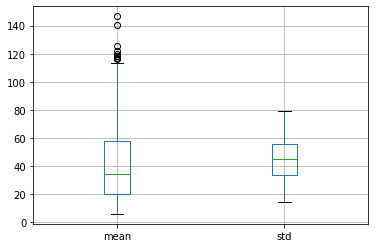

In [146]:
df.boxplot()

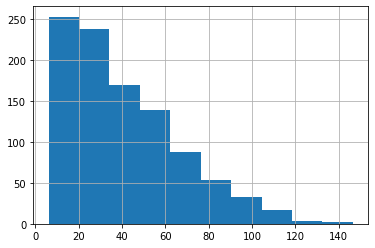

In [171]:
df['mean'].hist()

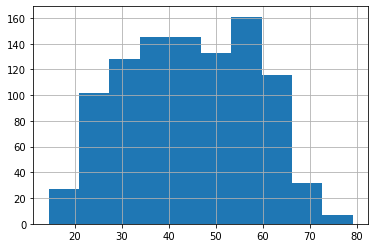

In [148]:
df['std'].hist()

In [162]:
df.describe()

,mean,std
count,996.000000,996.000000
mean,40.932612,44.586255
std,25.889609,13.544245
min,6.057635,14.450581
25%,19.908294,33.447438
50%,34.681022,44.859240
75%,57.708121,55.821979
max,146.625505,79.234911


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B65B8F88C8>,
      dtype=object)

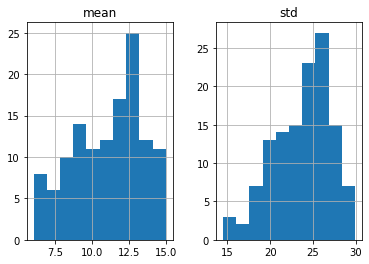

In [182]:
df[(df['mean']<15) & (df['std']<32)].hist()

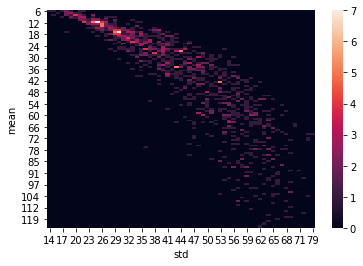

In [149]:
df2 = df.astype(int)
df2 = pd.crosstab(df2['mean'], df2['std'])
sns.heatmap(df2)

In [255]:
MEAN_UP, MEAN_DOWN = 7, 120  #mean_down, mean_up (based around the described df frame)
LAST_WRITE_NB_FRAMES = 20

In [256]:
# TODO comment
def split_video(video_path):
    video = cv2.VideoCapture(video_path)
    i = 0
    df_video = pd.DataFrame(columns = ['mean', 'std'])
    while(video.isOpened()):
        ret, image = video.read()
        if ret == True:
            video.set(cv2.CAP_PROP_POS_MSEC,(i*1000))
            image = image * mask792 #we know it's 792
            m, s = compute_mean_std(image, mask792)
            df_video.loc[i] = [m[0,0], s[0,0]]
            i += 1
        else:
            break
    video.release()
    return df_video

In [257]:
#Creates samples from a video
def create_samples_from_video(video_path, folder_path):
    video = cv2.VideoCapture(video_path)
    i = 0
    last_write = 100 #variable to avoid writing 2 images that are almost the same 
    
    while(video.isOpened()):
        ret, image = video.read()
        if ret == True:
            #if we have access to an image, we check the mean, after applying the mask
            image = image * mask792 #we know it's 792
            m = np.mean(image) *(1080*792/ active_792)
            
            if (m > MEAN_UP or m < MEAN_DOWN) and (last_write > LAST_WRITE_NB_FRAMES) :
                cv2.imwrite(f"{folder_path}/{video_path[31:-4]}_{i}.png", image)
                i+=1
                last_write = 0
            
            last_write += 1
        else:
            #need to get out the while loop if we can't read a file
            break
    video.release()

In [262]:
def multiple_videos_sample(path,nb_videos,ratio):
    videos_path = glob.glob(path)
    videos_in_train = int(nb_videos * ratio)
    #Creates first video in the train folder
    for video_path in videos_path[:videos_in_train]:
        create_samples_from_video(video_path, "data/LUS_proc_images/train/false")
    
    #then in the val folder
    for video_path in videos_path[videos_in_train:nb_videos]:
        create_samples_from_video(video_path, "data/LUS_proc_images/val/false")

In [263]:
multiple_videos_sample("data/Ultrason butterflynetwork/*.mp4", 50, 0.8)

In [22]:
"""# Renaming to appropriate format
def replace_dot_by_underscore(path):
    path_list = glob.glob(path)
    
    for old_path in path_list:
        new_path = old_path.replace(".", "_", 1)
        os.rename(old_path, new_path)
        
replace_dot_by_underscore("data/Ultrason butterflynetwork/*")"""

In [23]:
df_split = split_video("data/Ultrason butterflynetwork/1_1_QAID_1.mp4")

In [25]:
df_split

,mean,std
0,13.626837,33.396776
1,13.626837,33.396776
2,13.596254,33.613039
3,13.859770,34.045651
4,13.413530,33.645666
5,13.392406,33.487103
6,9.964788,30.747767
7,13.275161,32.323239
8,16.277448,35.185978
9,15.971615,34.889776


In [134]:
df_split = split_video("data/Ultrason butterflynetwork/1_9_QLD.mp4")

In [49]:
df_video2 = df_video.astype(int)
df_video2 = pd.crosstab(df_video2['mean'], df_video2['std'])
sns.heatmap(df_video2)

ValueError: zero-size array to reduction operation fmin which has no identity

In [ ]:
df_video.head(20)

,mean,std
0,37.864373,57.183505
1,37.115139,56.459659
2,36.875601,56.347352
3,36.314428,56.145268
4,35.674874,55.818582
5,35.115213,55.344910
6,34.517314,55.151923
7,34.099862,54.916397
8,34.293143,55.196529
9,34.775807,55.572057
